In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_TRENDLINE_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_TRENDLINE_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas
import sys
from sklearn.linear_model import LinearRegression
from scipy import stats
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [4]:
# SCRAPING DES DONNES BRUTES
eurusd = pd.read_csv('eurusd_15mn_1Y.csv')
eurusd = eurusd.set_index('Date')
eurusd = eurusd.iloc[:-2,1:-1]
eurusd.head()

,Open,High,Low,Close
Date,,,,
20180506 23:15:00,1.195975,1.196370,1.195975,1.196155
20180506 23:30:00,1.196155,1.196205,1.196020,1.196060
20180506 23:45:00,1.196060,1.196325,1.195575,1.195805
20180507 00:00:00,1.195805,1.196170,1.195780,1.195980
20180507 00:15:00,1.195980,1.196360,1.195960,1.196255


In [5]:
df = eurusd.iloc[-97:-5,:]
df.shape

(92, 4)

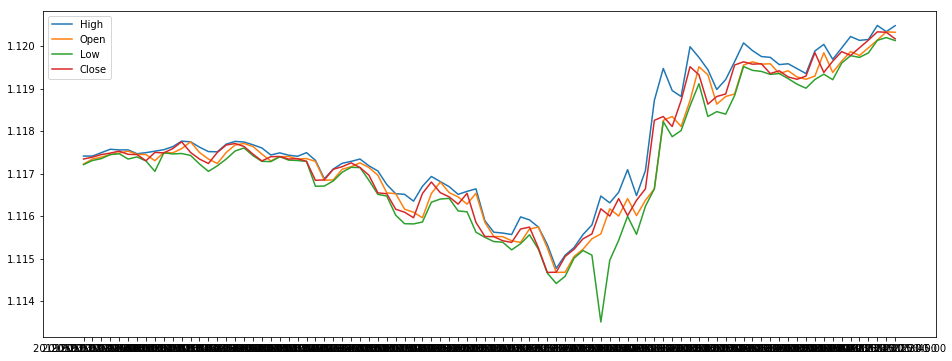

In [6]:
plt.figure(figsize=(16,6))
plt.plot(df['High'])
plt.plot(df['Open'])
plt.plot(df['Low'])
plt.plot(df['Close'])
plt.legend()

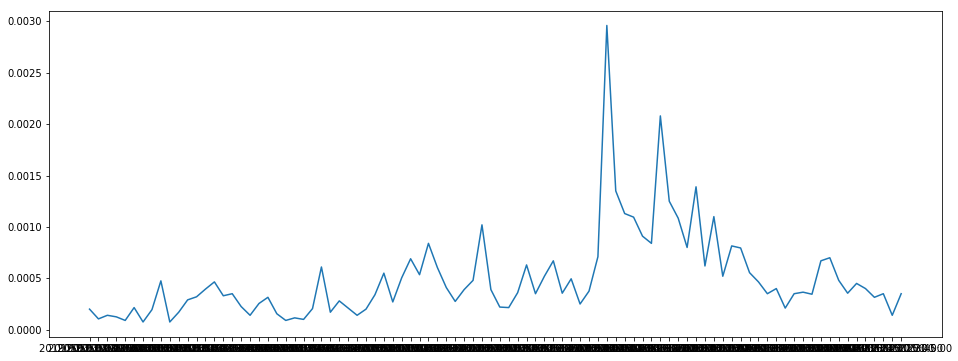

In [7]:
plt.figure(figsize=(16,6))
plt.plot((df['High']-df['Low']),label='Delat High - Close')

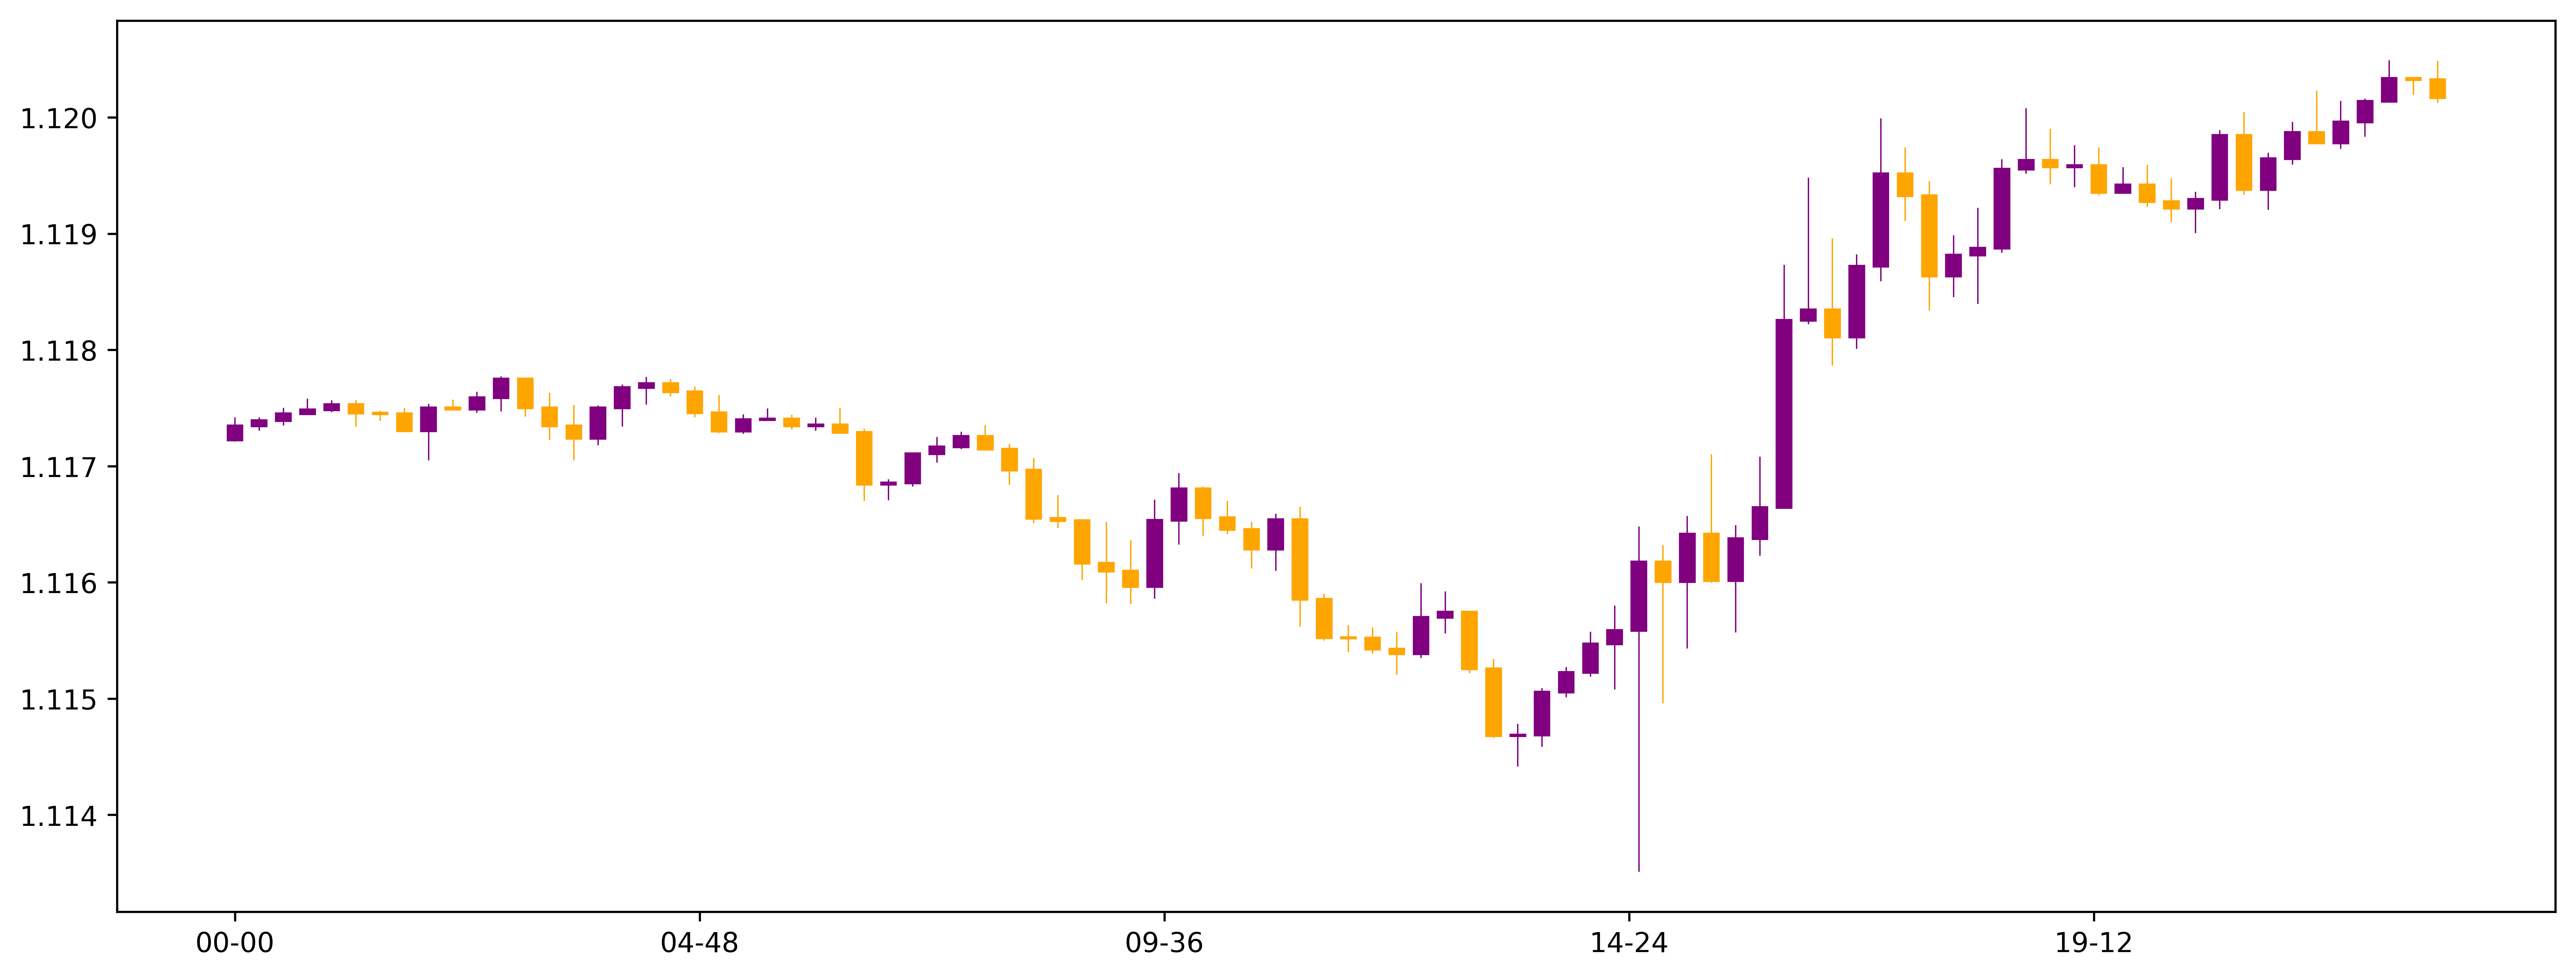

In [9]:
date_index = df.index
date = pd.to_datetime(date_index)
df.loc[:,'Date'] = date
df.loc[:,"Date"] = df["Date"].apply(mdates.date2num)
ohlc= df[['Date', 'Open', 'High', 'Low','Close']].copy()
f1, ax = plt.subplots(figsize = (16,6),dpi=600)
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

In [11]:
df.head(7)

,Open,High,Low,Close,Date
Date,,,,,
20190503 00:00:00,1.117225,1.117415,1.117215,1.117345,737182.000000
20190503 00:15:00,1.117345,1.117415,1.117310,1.117390,737182.010417
20190503 00:30:00,1.117390,1.117495,1.117355,1.117450,737182.020833
20190503 00:45:00,1.117450,1.117575,1.117450,1.117485,737182.031250
20190503 01:00:00,1.117485,1.117560,1.117470,1.117530,737182.041667
20190503 01:15:00,1.117530,1.117560,1.117345,1.117455,737182.052083
20190503 01:30:00,1.117455,1.117470,1.117395,1.117450,737182.062500


In [12]:
high_max_list = []
low_max_list = []
date_high = []
date_low = []

plot_high =[]
plot_low = []


for row in range(0,df.shape[0]-1,5):
    
    high_max_list.append(df.iloc[row:row+4,1].max())
    high_max_index = df[df['High'] == df.iloc[row:row+4,1].max()].index[0]
    date_high.append(df.loc[high_max_index,'Date'])
    plot_high.append((df.loc[high_max_index,'Date'],df.loc[high_max_index,'High']))
    
    low_max_list.append(df.iloc[row:row+4,2].min())
    low_max_index = df[df['Low'] == df.iloc[row:row+4,2].min()].index[0]
    date_low.append(df.loc[low_max_index,'Date'])
    plot_low.append((df.loc[low_max_index,'Date'],df.loc[low_max_index,'Low']))
    
    
    
        
    

In [13]:
len(plot_high),len(date_high),len(plot_low),len(date_low)

(19, 19, 19, 19)

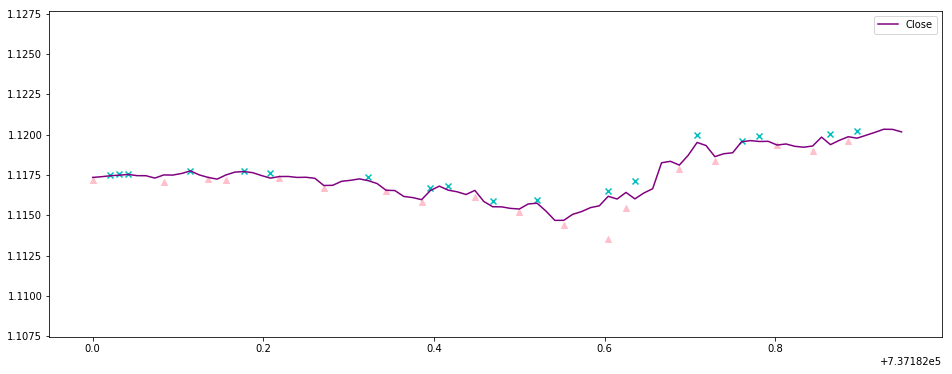

In [14]:
plt.figure(figsize=(16,6))
for i in range(0,len(plot_high)-1):
    plt.scatter(plot_high[i][0],plot_high[i][1],c='c',marker = 'x')
for i in range(0,len(plot_low)-1):
    plt.scatter(plot_low[i][0],plot_low[i][1],c='pink',marker='^')
plt.plot(df['Date'],df['Close'],color='purple')
plt.legend()

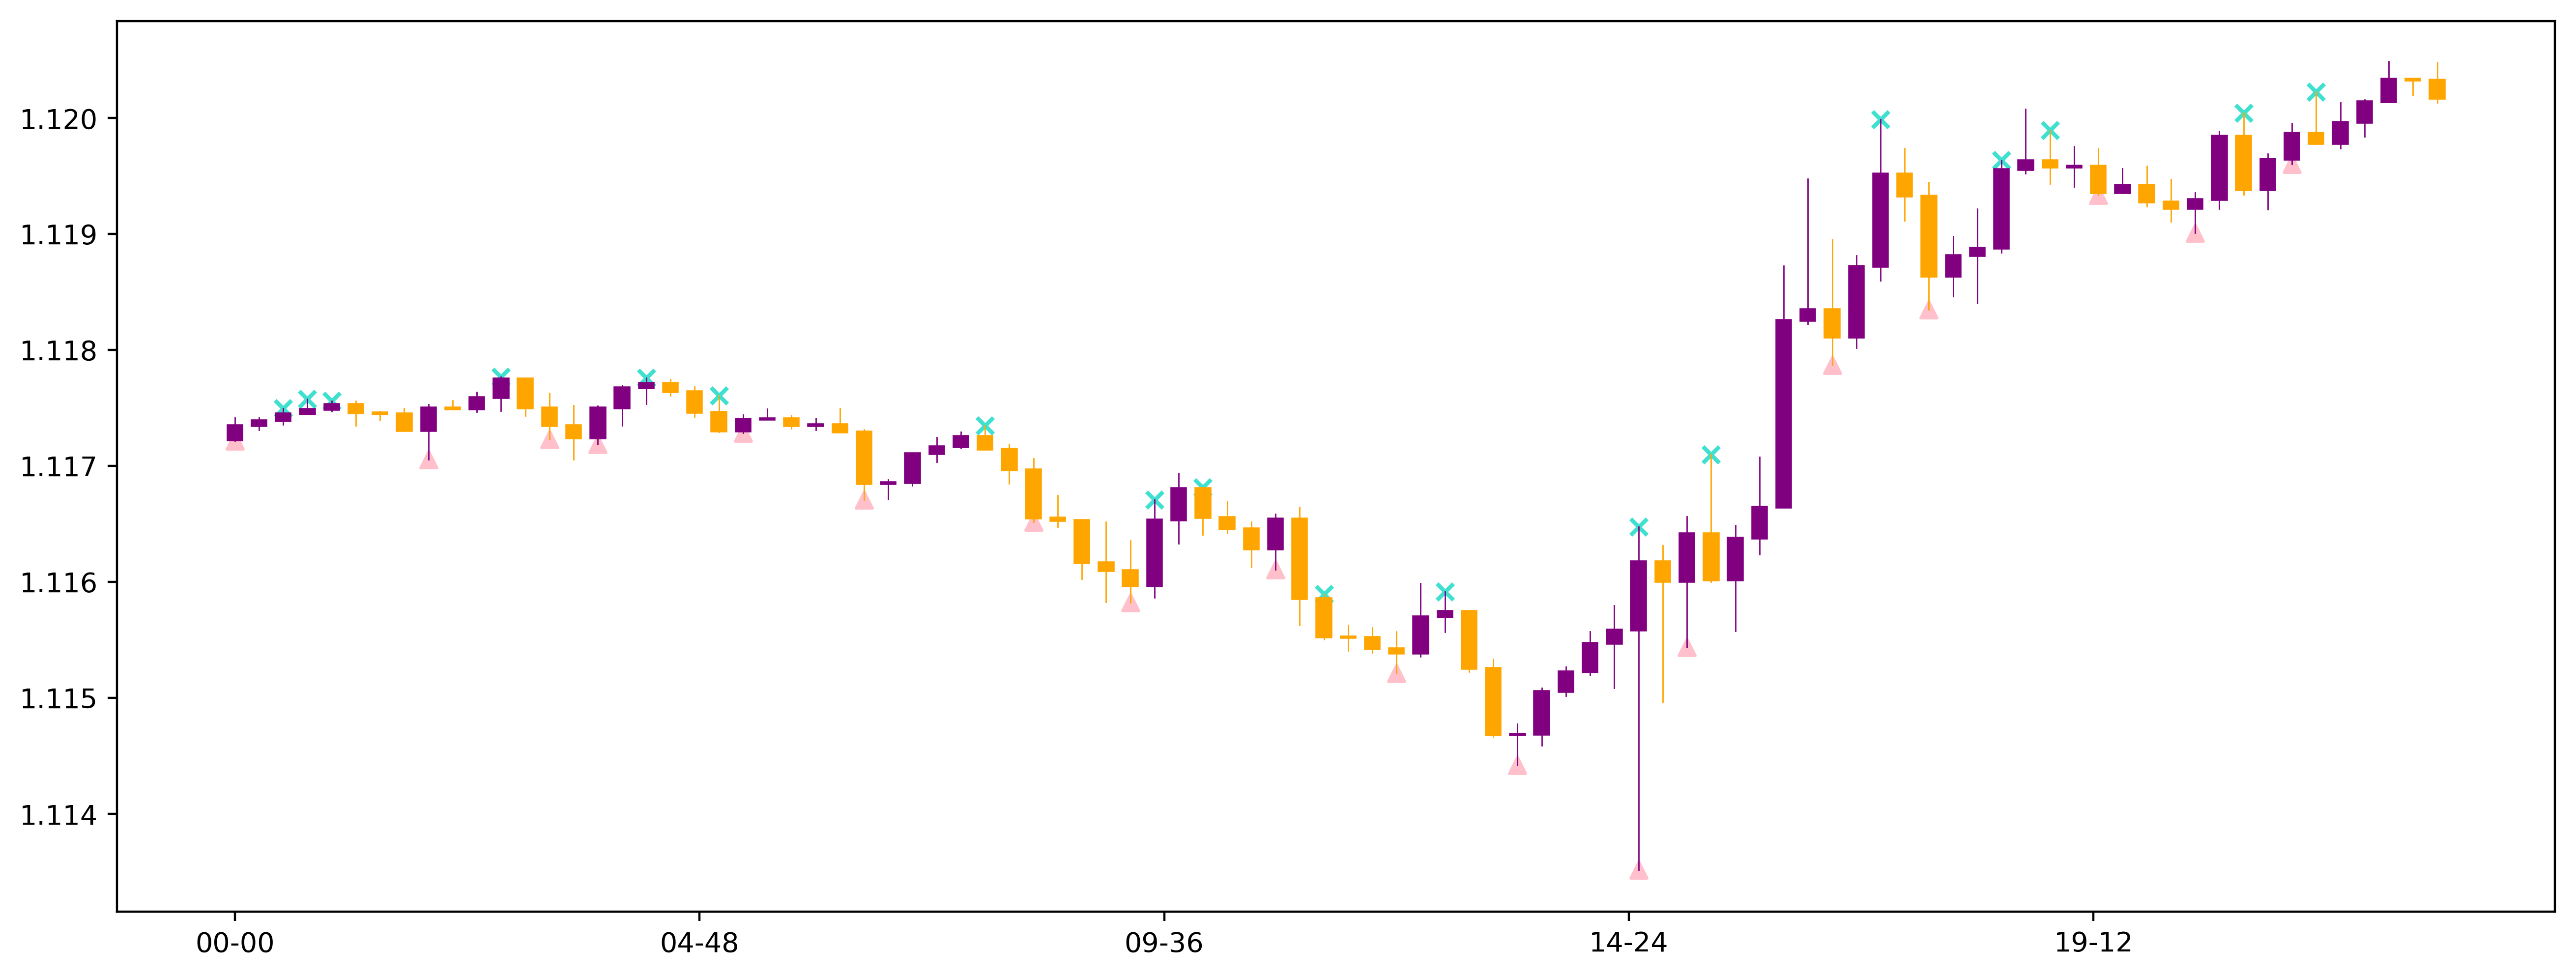

In [15]:
f1, ax = plt.subplots(figsize = (16,6),dpi=400)

for i in range(0,len(plot_high)-1):
    plt.scatter(plot_high[i][0],plot_high[i][1],c='turquoise',marker = 'x')
for i in range(0,len(plot_low)-1):
    plt.scatter(plot_low[i][0],plot_low[i][1],c='pink',marker='^')
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))


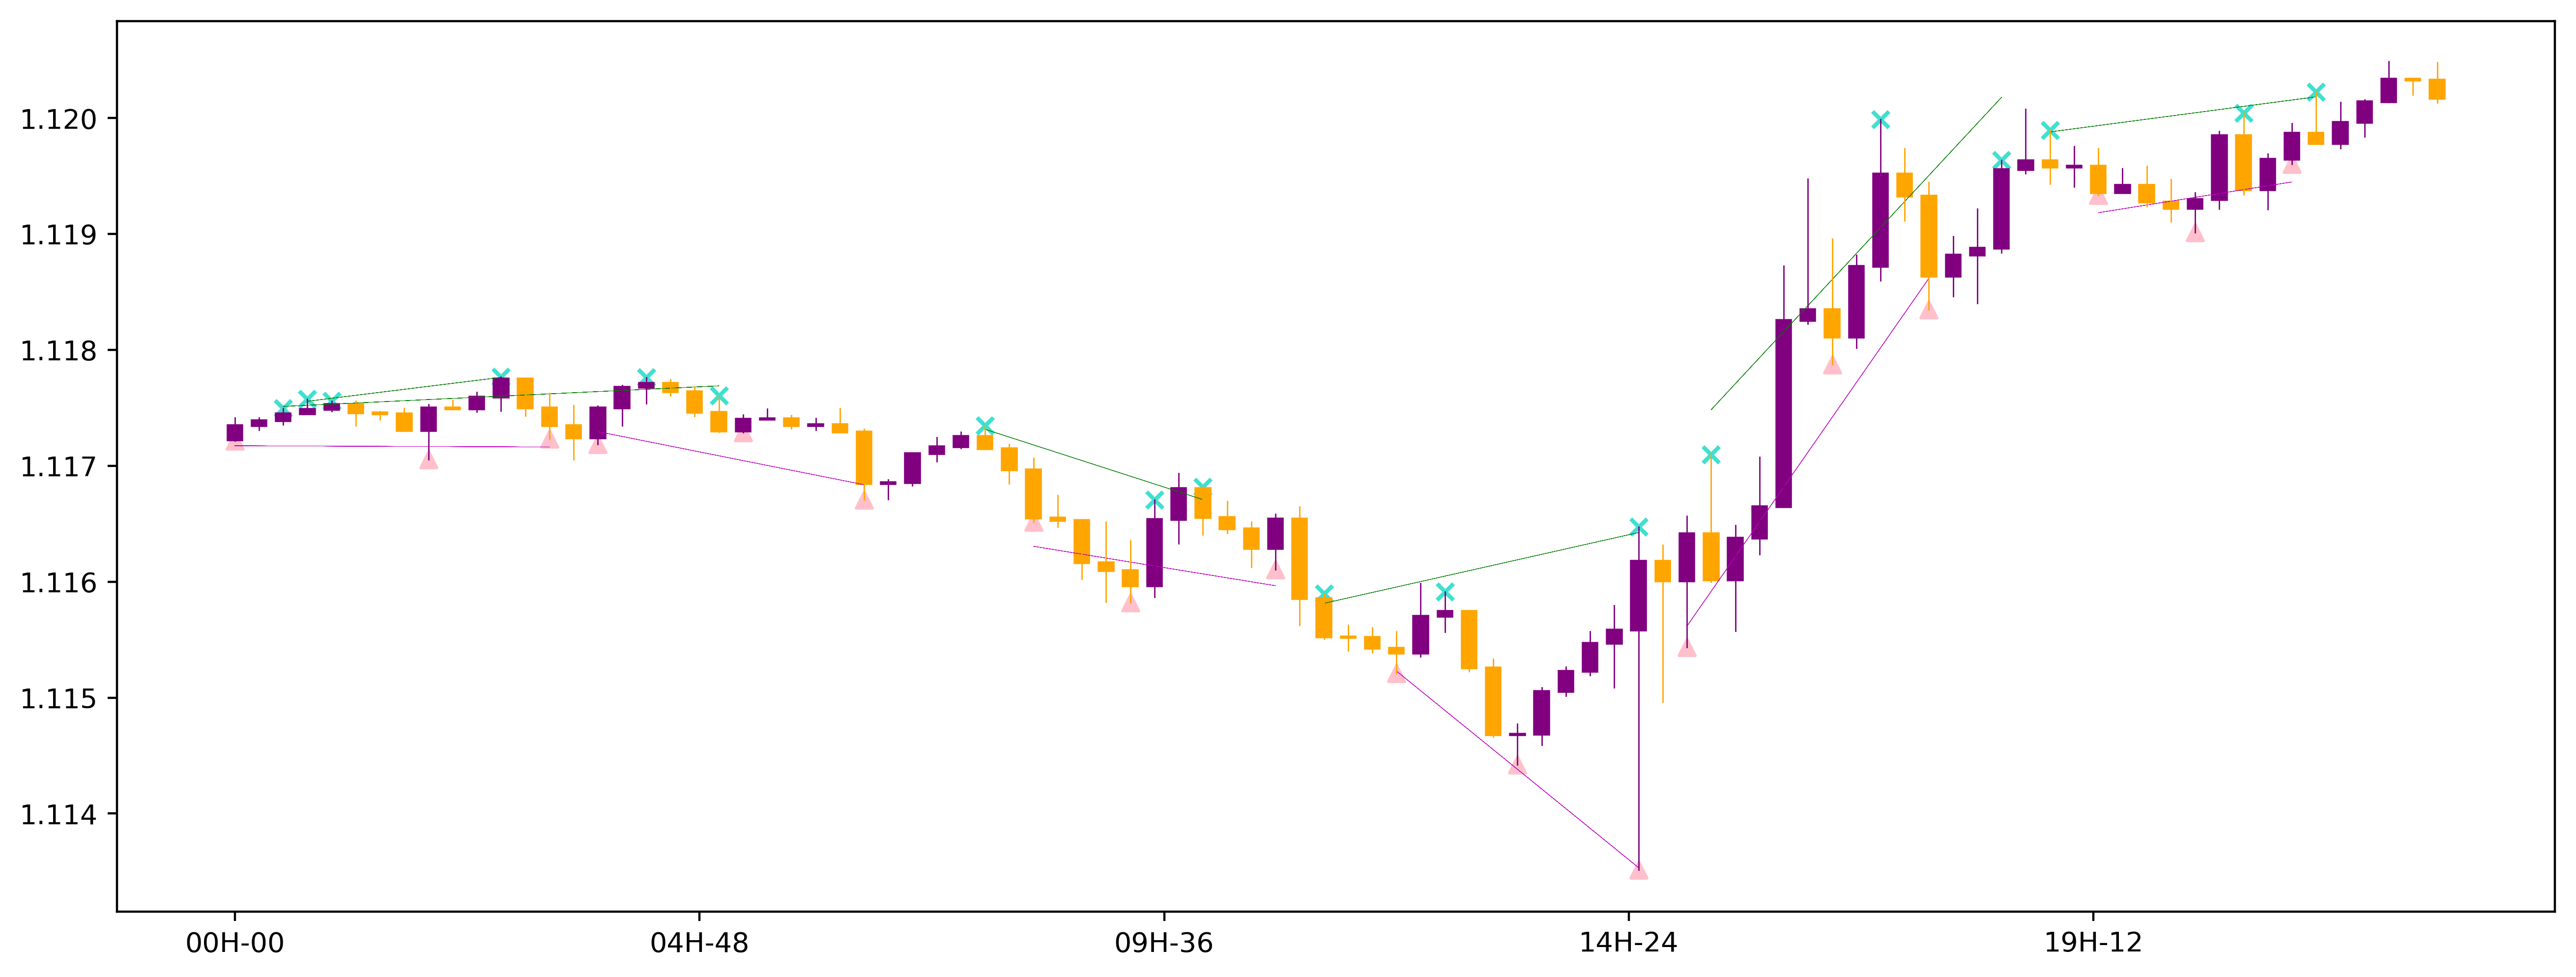

In [16]:
def trend_it(X,y,color):
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    ax.autoscale(tight=None, enable=None,axis='both')
    plt.plot(X, intercept + slope*np.asarray(X), color=color,linewidth=0.1)
    return(slope, intercept, r_value, p_value, std_err)


f1, ax = plt.subplots(figsize = (16,6),dpi=400)
for i in range(0,len(plot_high)-1):
    #ax.autoscale(tight=False, enable=False,axis='both')
    plt.scatter(plot_high[i][0],plot_high[i][1],c='turquoise',marker = 'x')
    plt.scatter(plot_low[i][0],plot_low[i][1],c='pink',marker='^')
    
    for dub in range(0,len(plot_high)-1,3):
        X = [plot_high[ii][0] for ii in range(dub, dub+3)]
        y = [plot_high[iii][1] for iii in range(dub, dub+3)]
        trend_it(X,y,'green')
    
    for dub in range(0,len(plot_low)-1,3):
        X = [plot_low[ii][0] for ii in range(dub, dub+3)]
        y = [plot_low[iii][1] for iii in range(dub, dub+3)]
        trend_it(X,y,'m')
    
#for i in range(0,len(plot_low)-1):
#    
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH-%M'))

In [20]:
def hough_line(img):
  # Rho and Theta ranges
  thetas = np.deg2rad(np.arange(-90.0, 90.0))
  width = len(img)
  height = len(img)
  diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
  rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((2 * int(diag_len), num_thetas), dtype=(np.uint64))
  y_idxs = np.nonzero(img)
  x_idxs = np.nonzero(img)  # (row, col) indexes to edges

  # Vote in the hough accumulator
  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      rho = np.round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
      accumulator[int(rho), int(t_idx)] += 1

  return accumulator, thetas, rhos

In [21]:
accumulator_high, thetas_high, rhos_high = hough_line(high_max_list)

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


TypeError: only size-1 arrays can be converted to Python scalars

In [87]:
df = df.iloc[:,:-1]
df.head()

,Open,High,Low,Close
Date,,,,
20190503 00:00:00,1.117225,1.117415,1.117215,1.117345
20190503 00:15:00,1.117345,1.117415,1.117310,1.117390
20190503 00:30:00,1.117390,1.117495,1.117355,1.117450
20190503 00:45:00,1.117450,1.117575,1.117450,1.117485
20190503 01:00:00,1.117485,1.117560,1.117470,1.117530
